dataset: https://www.kaggle.com/datasets/muhammadjawwadismail/hr-competency-scores-for-screening

# BUSSINESS UNDERSTANDING

Karna d perlukan meningkatnya kebutuhan akan wawasan tentang proses perekrutan dan pentingnya memilih kandidat yang memiliki keseimbangan antara kompetensi fungsional dan perilaku. Dengan ini diperlukan pembuatan model guna memprediksi dan membantu dalam pengambilan keputusan proses rekrutmen karyawan dalam proses penyaringan interview.

Model ini dibuat menggunakan metode klasifikasi dan algoritma Support Vector Classifier (SVC) dengan inputan:

- Jumlah tahun pengalaman yang dimiliki kandidat dibidangnya
- skor yang mewakili kompetensi fungsional kandidat berdasarkan tes
- Skor keterampilan paling berharga yang dimiliki kandidat
- Skor keterampilan paling berharga kedua yang dimiliki kandidat
- Skor keterampilan paling berharga ketiga yang dimiliki kandidat
- Skor yang mewakili kompetensi perilaku kandidat yang diperoleh dari tes SDM
- Skor keterampilan perilaku paling berharga yang dimiliki kandidat
- Skor keterampilan perilaku paling berharga kedua yang dimiliki kandidat
- Skor dari keterampilan perilaku paling berharga ketiga yang dimiliki kandidat

Dengan Output Kandidat Tidak Dipanggil Untuk Interview (0) atau Kandidat Dipanggil Untuk Interview (1)

1. Tentukan Library yang digunakan

In [114]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

2. Load Dataset

In [115]:
HR_dataset = pd.read_csv('dataset.csv')

# DATA UNDERSTANDING

Kumpulan data ini mencakup 10 fitur:

years_of_experience - (float64) Jumlah tahun pengalaman yang dimiliki kandidat di bidangnya

functional_competency_score - (float64) Skor yang mewakili kompetensi fungsional kandidat berdasarkan tes

top1_skills_score - (float64) Skor keterampilan paling berharga yang dimiliki kandidat

top2_skills_score - (float64) Skor keterampilan paling berharga kedua yang dimiliki kandidat

top3_skills_score - (float64) Skor keterampilan paling berharga ketiga yang dimiliki kandidat

behavior_competency_score - (float64) Skor yang mewakili kompetensi perilaku kandidat yang diperoleh dari tes SDM

top1_behavior_skill_score - (float64) Skor keterampilan perilaku paling berharga yang dimiliki kandidat

top2_behavior_skill_score - (float64) Skor keterampilan perilaku paling berharga kedua yang dimiliki kandidat

top3_behavior_skill_score - (float64) Skor dari keterampilan perilaku paling berharga ketiga yang dimiliki kandidat

call_for_interview - (0 atau 1) Variabel biner yang menunjukkan apakah kandidat dipanggil untuk wawancara atau tidak

In [116]:
HR_dataset.head()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1


In [117]:
HR_dataset.shape

(300, 10)

In [118]:
HR_dataset['call_for_interview'].value_counts()

call_for_interview
1    159
0    141
Name: count, dtype: int64

In [147]:
HR_dataset.columns

Index(['years_of_experience', 'functional_competency_score',
       'top1_skills_score', 'top2_skills_score', 'top3_skills_score',
       'behavior_competency_score', 'top1_behavior_skill_score',
       'top2_behavior_skill_score', 'top3_behavior_skill_score',
       'call_for_interview'],
      dtype='object')

# DATA PREPARATION

([<matplotlib.patches.Wedge at 0x1528609f4c0>,
 [Text(-0.10351904621929765, 1.095118170367859, '1'),
  Text(0.10351894368693447, -1.0951181800600067, '0')],
 [Text(-0.05646493430143508, 0.597337183837014, '53%'),
  Text(0.056464878374691524, -0.59733718912364, '47%')])

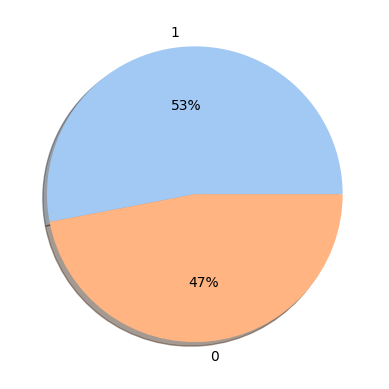

In [119]:
palette_color = sns.color_palette('pastel')
plt.pie(x = HR_dataset['call_for_interview'].value_counts(),
            labels=HR_dataset['call_for_interview'].value_counts().index,
            autopct='%.0f%%',
            shadow=True,
            colors= palette_color)

In [120]:
def plots(HR_dataset, t):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.barplot(HR_dataset, x='call_for_interview', y=t, palette='summer', ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container, color='black', size=10, padding=10)
        
    sns.histplot(HR_dataset, x=t, ax=axes[1], kde=True, color='g')
        
    plt.suptitle(t)
        
    plt.show()

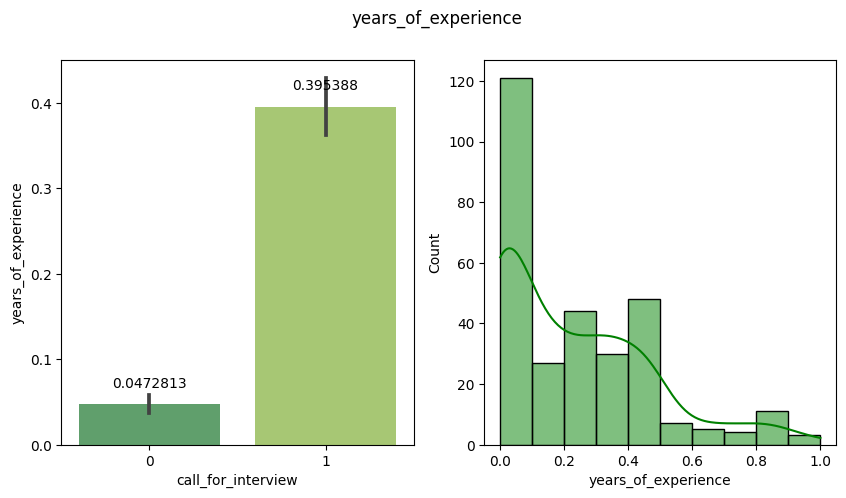

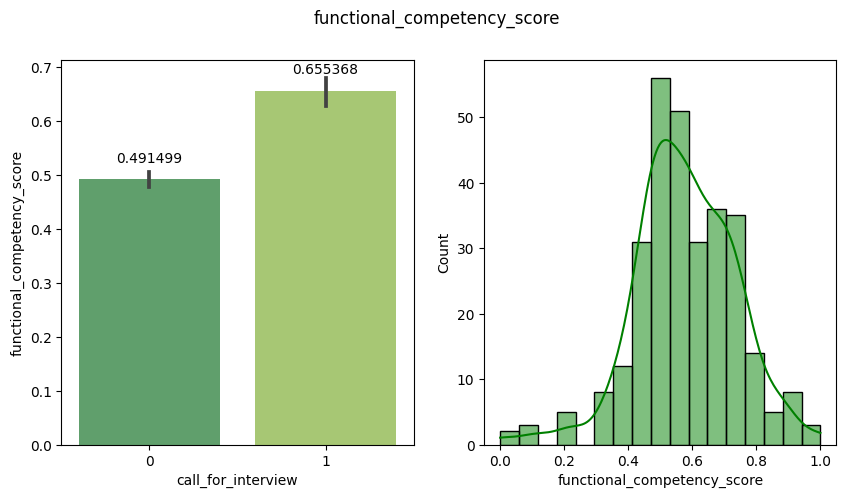

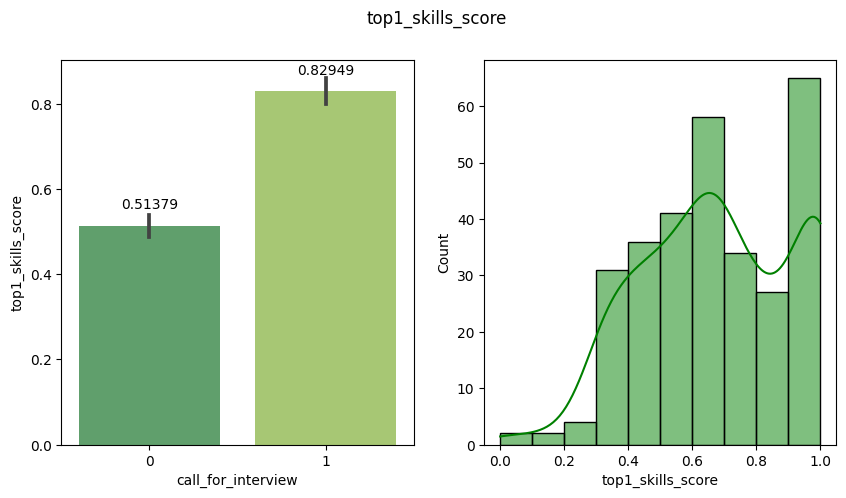

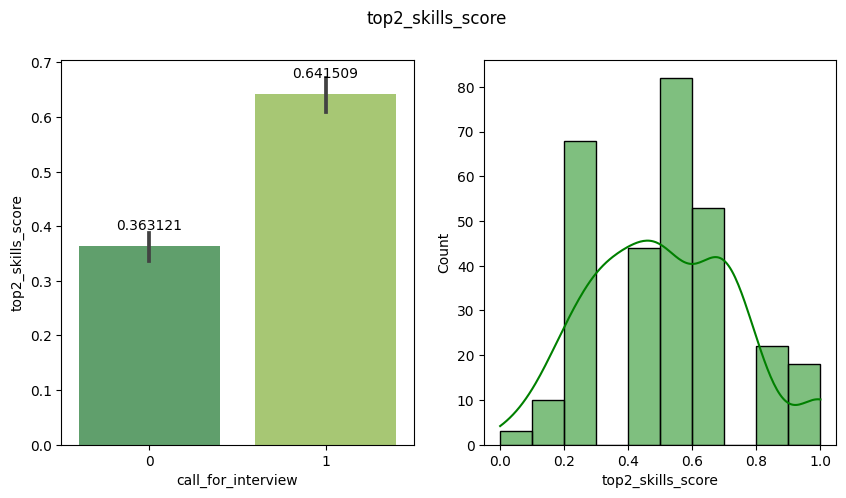

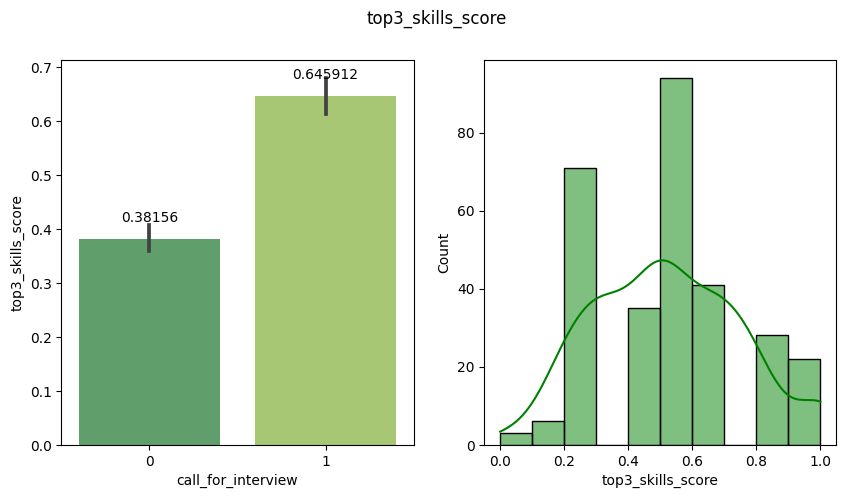

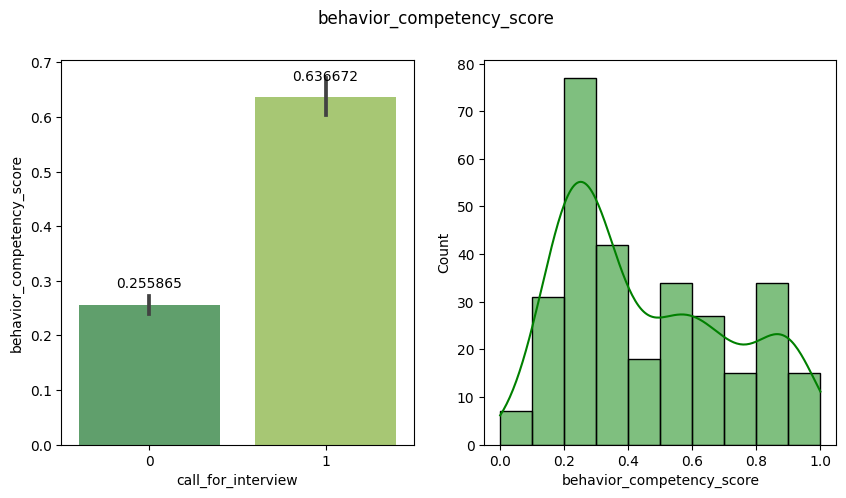

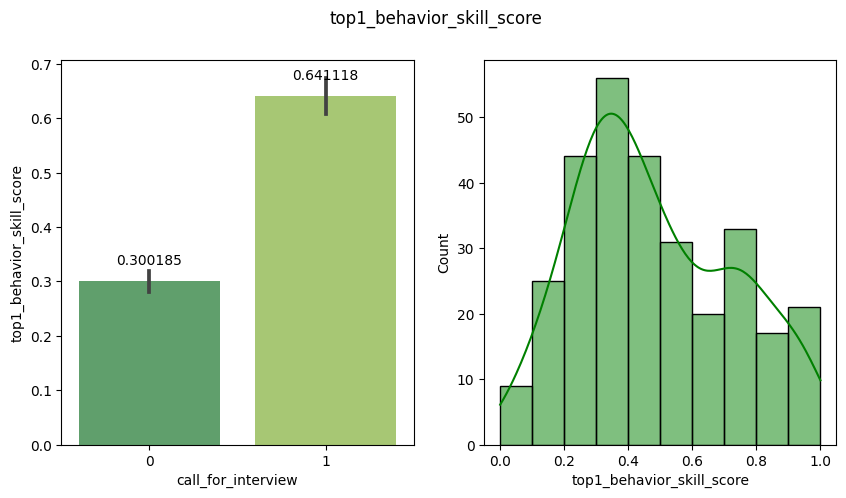

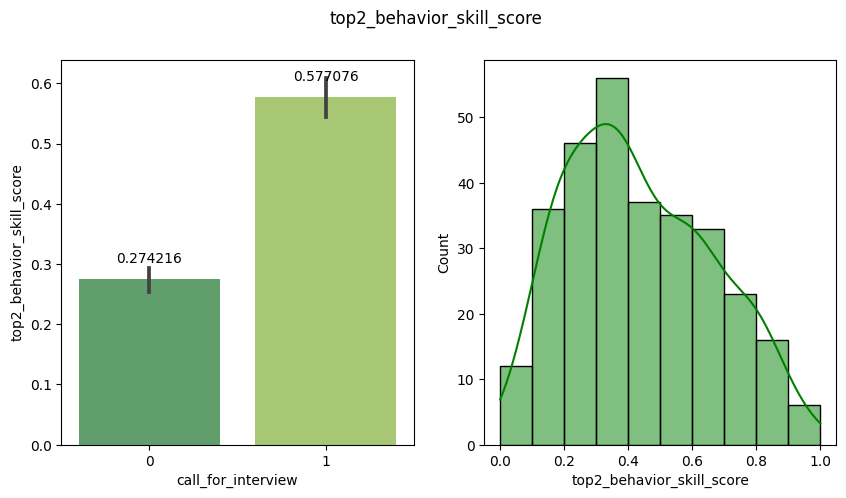

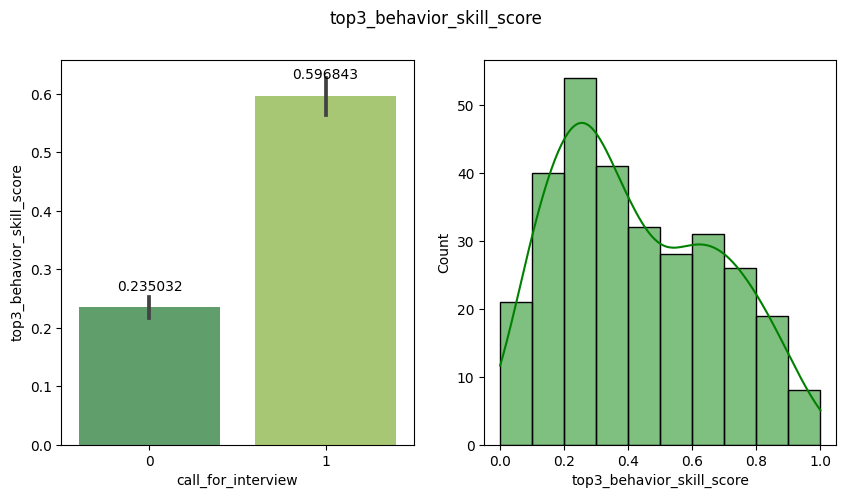

In [121]:
for i in HR_dataset.columns[:-1]:
    plots(HR_dataset, i)

# MODELLING

In [126]:
# memisahkan data dan label
X = HR_dataset.drop (columns='call_for_interview', axis=1)
Y = HR_dataset['call_for_interview']

In [127]:
print(X)

     years_of_experience  functional_competency_score  top1_skills_score   
0               0.333333                     0.749498           0.777778  \
1               0.133333                     0.490638           0.777778   
2               0.000000                     0.460256           0.444444   
3               0.000000                     0.507347           0.555556   
4               0.400000                     0.662020           0.666667   
..                   ...                          ...                ...   
295             0.000000                     0.576078           0.555556   
296             0.000000                     0.587738           0.555556   
297             0.400000                     0.740044           0.666667   
298             0.333333                     0.654656           0.666667   
299             0.600000                     0.754280           0.222222   

     top2_skills_score  top3_skills_score  behavior_competency_score   
0              

In [128]:
print(Y)

0      1
1      0
2      0
3      0
4      1
      ..
295    0
296    1
297    1
298    1
299    1
Name: call_for_interview, Length: 300, dtype: int64


3. Standarisasi Data

In [129]:
scaler = StandardScaler()

In [130]:
scaler.fit(X)

StandardScaler()

In [131]:
standarized_data = scaler.transform(X)

In [132]:
print(standarized_data)

[[ 0.42618231  1.12253197  0.40683087 ...  1.85052793  1.00808787
   1.31407962]
 [-0.41312639 -0.59221885  0.40683087 ... -0.52865659 -1.34155254
  -0.44339269]
 [-0.97266553 -0.79347799 -0.99603421 ... -1.75908195 -1.52988156
  -0.69374929]
 ...
 [ 0.70595187  1.05991082 -0.06079082 ...  0.82523529  0.56805549
   1.02735375]
 [ 0.42618231  0.49427431 -0.06079082 ...  0.42811285  0.50704292
   0.95401565]
 [ 1.54526058  1.15421056 -1.9312776  ...  1.87049393  1.58981584
   1.17879425]]


In [133]:
X = standarized_data
Y = HR_dataset['call_for_interview']

In [134]:
print(X)
print(Y)

[[ 0.42618231  1.12253197  0.40683087 ...  1.85052793  1.00808787
   1.31407962]
 [-0.41312639 -0.59221885  0.40683087 ... -0.52865659 -1.34155254
  -0.44339269]
 [-0.97266553 -0.79347799 -0.99603421 ... -1.75908195 -1.52988156
  -0.69374929]
 ...
 [ 0.70595187  1.05991082 -0.06079082 ...  0.82523529  0.56805549
   1.02735375]
 [ 0.42618231  0.49427431 -0.06079082 ...  0.42811285  0.50704292
   0.95401565]
 [ 1.54526058  1.15421056 -1.9312776  ...  1.87049393  1.58981584
   1.17879425]]
0      1
1      0
2      0
3      0
4      1
      ..
295    0
296    1
297    1
298    1
299    1
Name: call_for_interview, Length: 300, dtype: int64


4. Memisahkan Data Training dan Data Testing

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [136]:
print(X.shape, X_train.shape, X_test.shape)

(300, 9) (240, 9) (60, 9)


5. Membuat data latih menggunakan algoritma SVM

In [137]:
classifier = svm.SVC(kernel='linear')

In [138]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

6. membuat model evaluasi untuk mengukur tingkat akurasi

In [139]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [140]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  0.9291666666666667


In [141]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [142]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.95


7. Membuat Model Prediksi

In [143]:
input_data = (0.333333, 0.749498, 0.777778, 0.7, 0.8, 0.769231, 0.931689, 0.662042, 0.752463)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshape)
print()
print(prediction)
print()

if (prediction[0] == 0):
    print('Kandidat Tidak Dipanggil Untuk Interview')
else :
    print('Kandidat dipanggil Untuk Interview')


[1]

Kandidat dipanggil Untuk Interview


8. simpan model

In [144]:
import pickle

In [145]:
filename = 'klasifikasi_HR.sav'
pickle.dump(classifier, open(filename,'wb'))